In [1]:
print("My name is {Qianyi Liu}")
print("My NetID is: {qianyil2}")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is {Qianyi Liu}
My NetID is: {qianyil2}
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data2=pd.read_csv('housing2.csv')
data1=pd.read_csv('housing.csv')

## EDA

In [13]:
#getting info for both of the dataset
data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       452 non-null float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


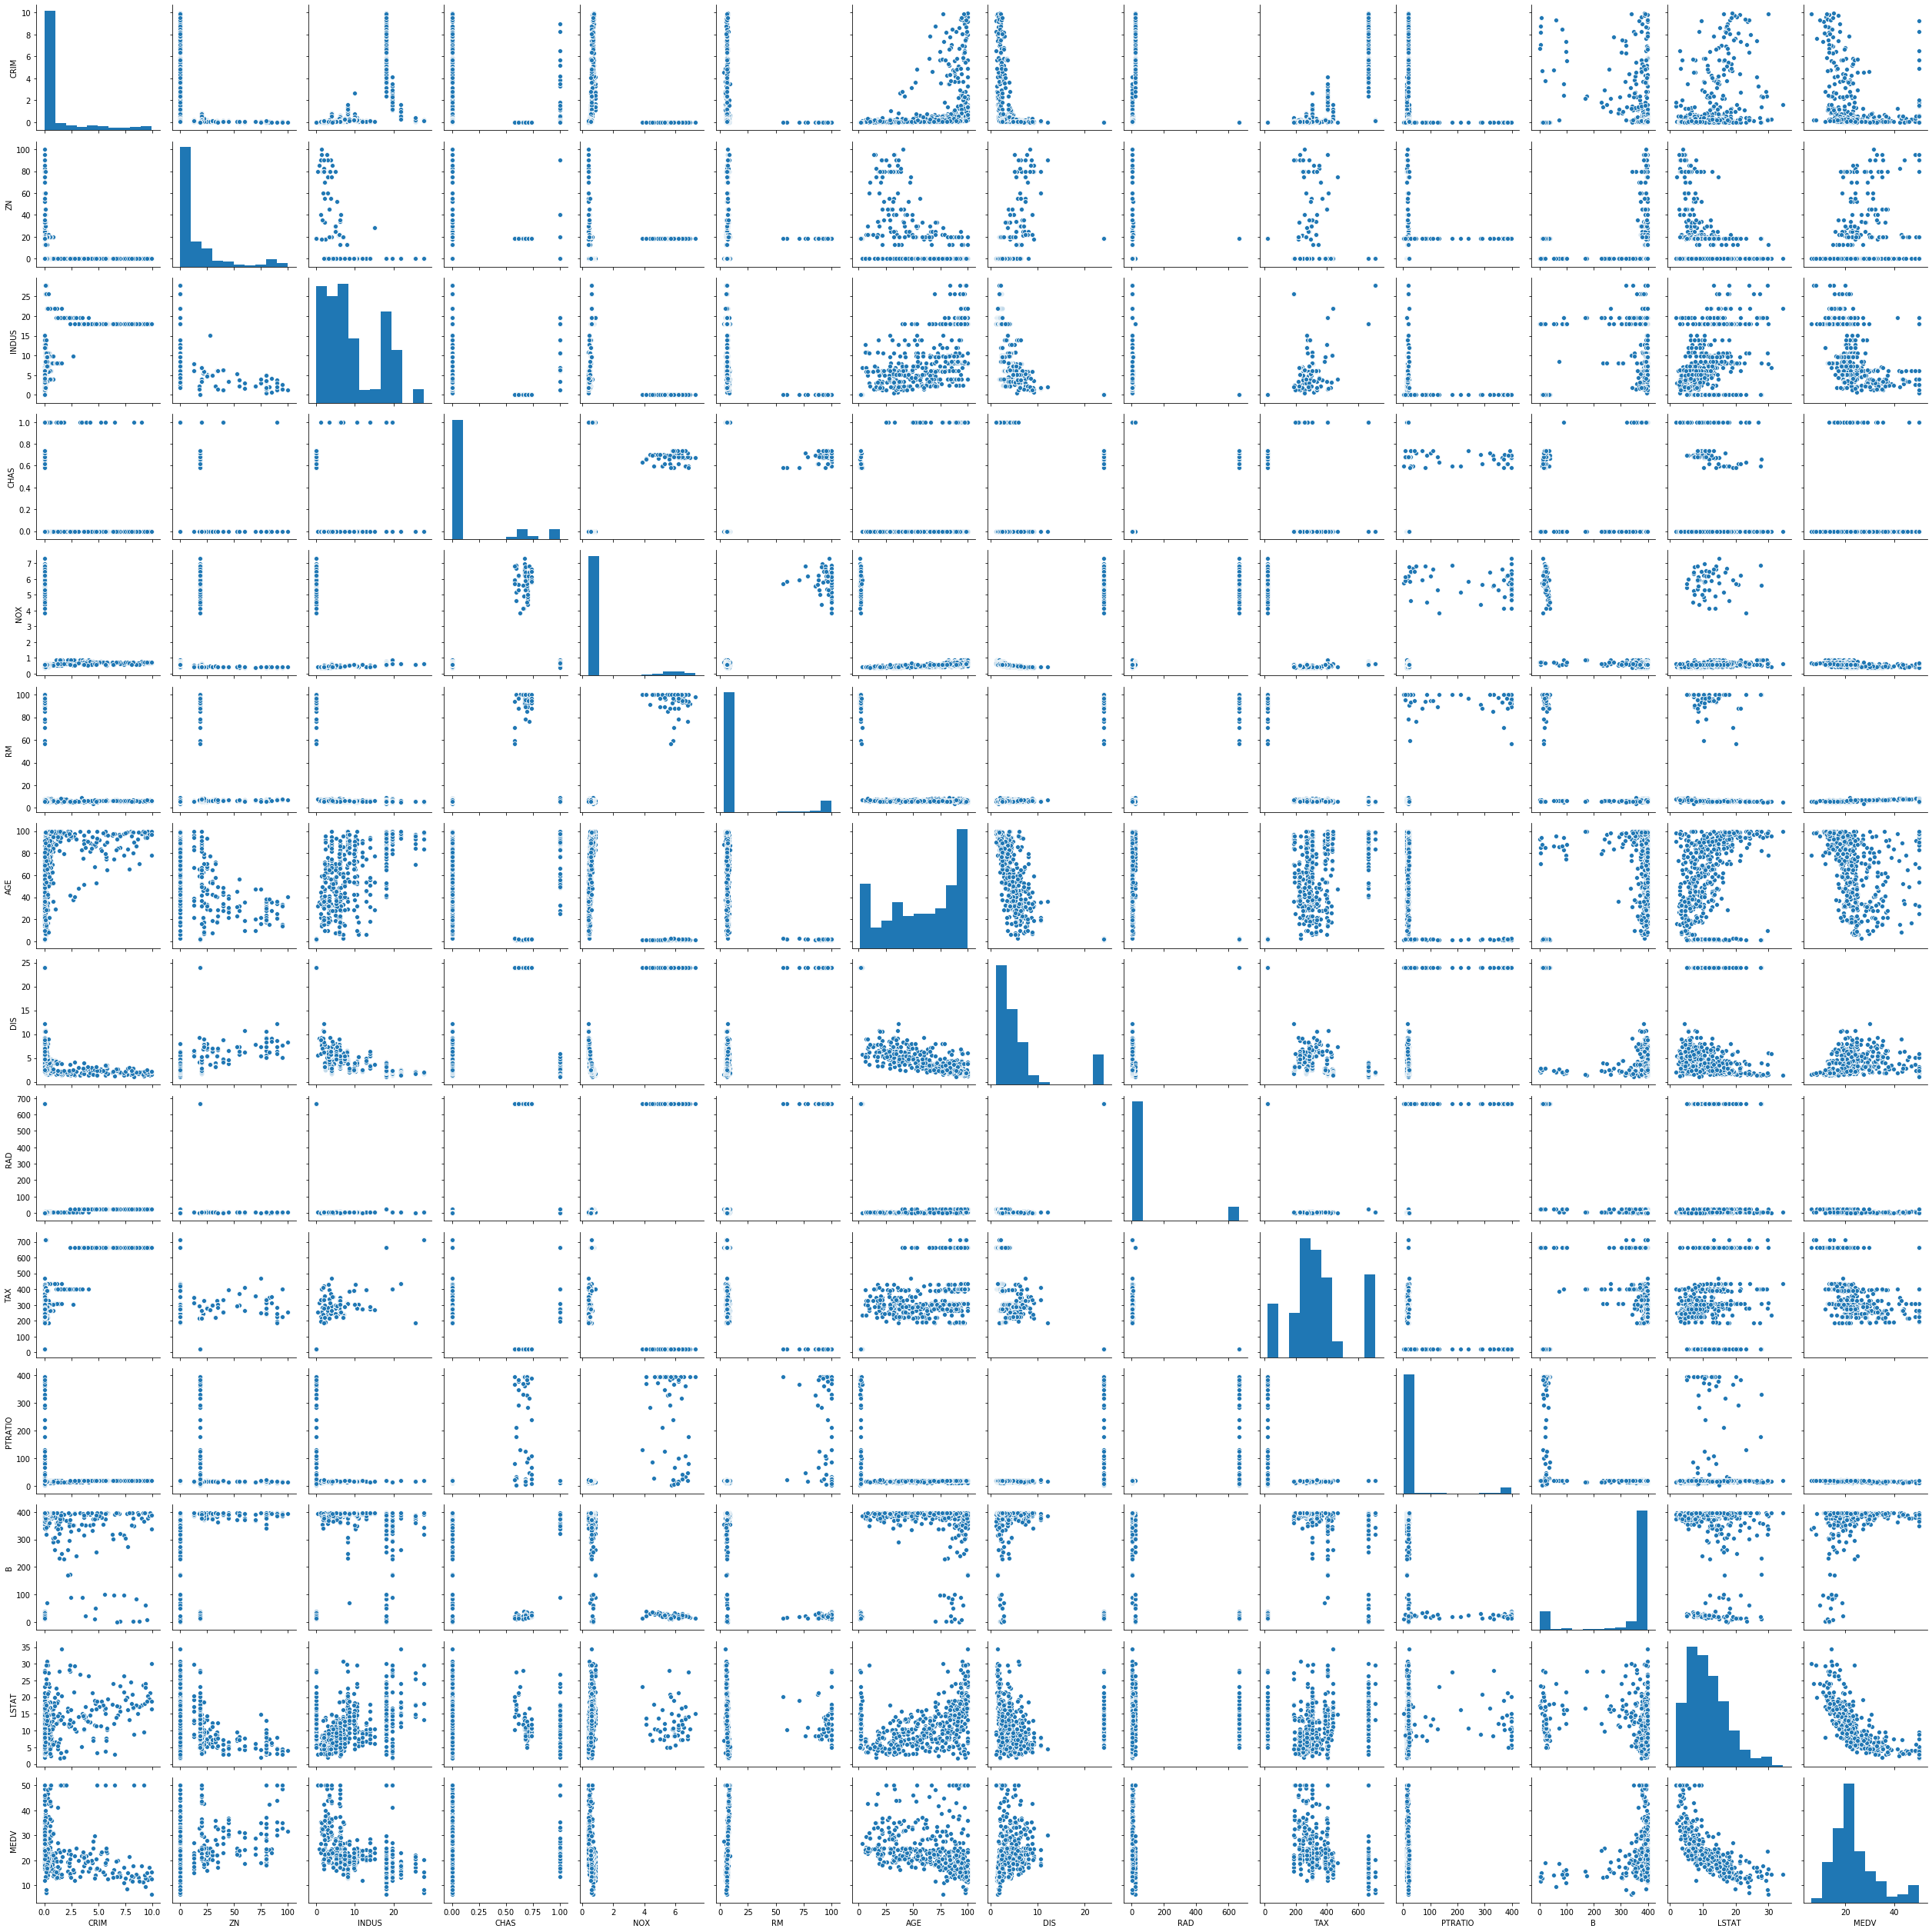

In [14]:
cols = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
sns.pairplot(data1[cols], size=2.5)
plt.tight_layout()
plt.show()

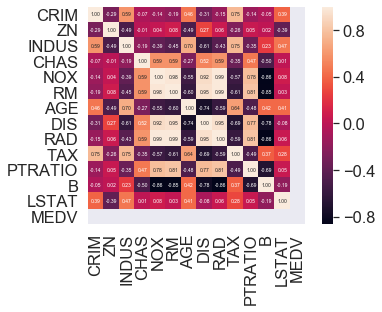

In [18]:
cm = np.corrcoef(data1[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,cbar=True,annot=True,square=True,
fmt='.2f',annot_kws={'size': 5},yticklabels=cols,xticklabels=cols)
plt.show()

In [19]:
# End of the first part.
# Now we start to use the second dataset and let's get the info first
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 27 columns):
ATT1       506 non-null float64
ATT2       506 non-null float64
ATT3       506 non-null float64
ATT4       506 non-null float64
ATT5       506 non-null float64
ATT6       506 non-null float64
ATT7       506 non-null float64
ATT8       506 non-null float64
ATT9       506 non-null float64
ATT10      506 non-null float64
ATT11      506 non-null float64
ATT12      506 non-null float64
ATT13      506 non-null float64
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       452 non-null float64
dtypes: float64(26), int64(1)
mem

## Linear Regression

In [23]:

data2.dropna(inplace=True)
data2.head()
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

X=data2[data2.columns[:-1]].values
y=data2['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print('Shape of X_train: ', X_train.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_test: ', y_test.shape)

Shape of X_train:  (361, 26)
Shape of y_train:  (361,)
Shape of X_test:  (91, 26)
Shape of y_test:  (91,)


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

slr = LinearRegression()
slr.fit(X_train,y_train)

print('coefficient: ', slr.coef_)
print('intercept: ', slr.intercept_)
print('R2 training: ', slr.score(X_train, y_train))
print('MSE training: ', mean_squared_error(slr.predict(X_train), y_train))
print('R2 testing : ', slr.score(X_test, y_test))
print('MSE testing : ', mean_squared_error(slr.predict(X_test), y_test))

coefficient:  [ 6.36878258e-01 -8.80800117e-02  2.50145305e-01 -3.47528161e-03
 -8.45940464e-02 -2.34404053e-01 -3.38209259e-02 -2.23346672e-01
 -1.33484470e-01 -2.51521110e-01 -3.76748360e-01  3.34629218e-01
 -4.72357790e-02 -4.78393874e-01  7.67080415e-01  3.43980336e-01
  4.95866507e-01 -1.42173379e+00  3.76577552e+00 -6.44302821e-01
 -2.89568308e+00  1.90480739e+00 -1.49260936e+00 -1.92347223e+00
  9.33146703e-01 -2.88167784e+00]
intercept:  23.911911357340742
R2 training:  0.759485972241301
MSE training:  19.076839001549025
R2 testing :  0.6782810596985454
MSE testing :  22.320863963140166


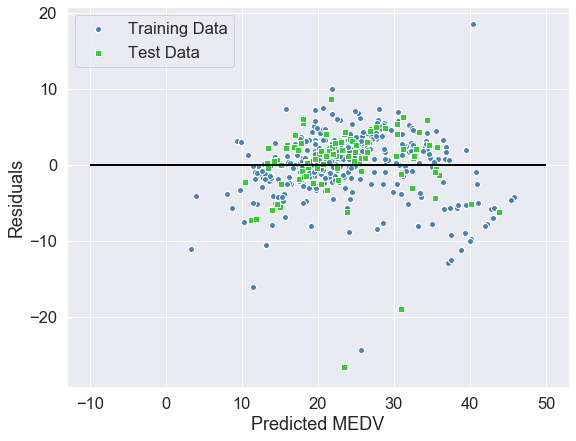

In [25]:
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

residual_train = y_train_pred-y_train
residual_test = y_test_pred-y_test
plt.figure(figsize=(9,7))
plt.scatter(y_train_pred, residual_train, c='steelblue', marker='o', edgecolor='white', label='Training Data')
plt.scatter(y_test_pred, residual_test, c='limegreen', marker='s', edgecolor='white', label='Test Data')
plt.xlabel("Predicted MEDV")
plt.ylabel("Residuals")
plt.hlines(y=0,xmin=-10,xmax=50, color='black',lw=2)
plt.legend(loc='upper left')
plt.show()

## Ridge Regression


In [29]:
from sklearn.linear_model import Ridge

min_test_mse = 40000
min_test_mse_list = []

for a in np.arange(0,100,0.0025):
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    min_test_mse_list.append(mean_squared_error(ridge.predict(X_test), y_test))
    if mean_squared_error(ridge.predict(X_test), y_test) < min_test_mse:
        best_a = a
        min_test_mse = mean_squared_error(ridge.predict(X_test), y_test)
        coef = ridge.coef_
        intercept = ridge.intercept_
        train_R2 = ridge.score(X_train, y_train)
        test_R2 = ridge.score(X_test, y_test)
        train_mse = mean_squared_error(ridge.predict(X_train), y_train)

print('Lowest test MSE is ', min_test_mse)
print('Best Alpha is ', best_a)
print('coefficient: ', coef)
print('intercept: ', intercept)
print('R2 training: ', train_R2)
print('MSE training: ', train_mse)
print('R2 testing: ', test_R2)
print('MSE testing: ', min_test_mse)

Lowest test MSE is  22.172878410407332
Best Alpha is  20.1375
coefficient:  [ 5.80768431e-01 -1.24372962e-01  2.27354935e-01 -4.67674053e-02
 -9.11949084e-02 -2.08784161e-01  3.04773895e-03 -2.09271380e-01
 -1.20305202e-01 -2.32097487e-01 -3.49298498e-01  3.15313995e-01
 -5.26780979e-02 -2.06669298e-01  5.73291321e-01  2.91407727e-02
  5.38849644e-01 -1.06133789e+00  3.66769070e+00 -5.42301532e-01
 -2.40149912e+00  1.12420329e+00 -9.59694458e-01 -1.80760060e+00
  9.19787055e-01 -2.84925363e+00]
intercept:  23.911911357340742
R2 training:  0.7567424345876936
MSE training:  19.29444803916018
R2 testing:  0.680414030684066
MSE testing:  22.172878410407332


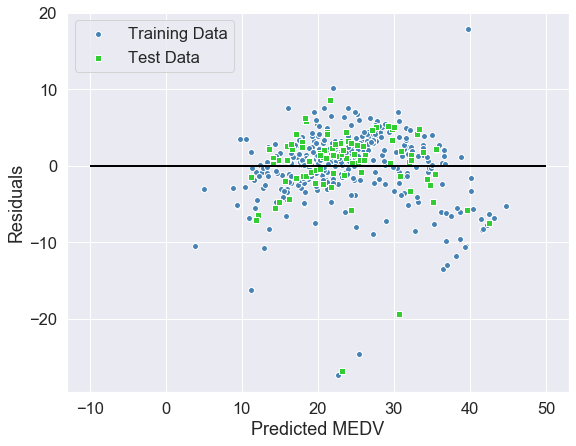

In [30]:
ridge_best = Ridge(alpha=20.1375)
# we put the same alpha value as shown above
ridge_best.fit(X_train, y_train)

y_train_pred_ridge = ridge_best.predict(X_train)
y_test_pred_ridge = ridge_best.predict(X_test)

residual_train_ridge = y_train_pred_ridge - y_train
residual_test_ridge = y_test_pred_ridge - y_test
plt.figure(figsize=(9,7))
plt.scatter(y_train_pred_ridge, residual_train_ridge, c='steelblue', marker='o', edgecolor='white', label='Training Data')
plt.scatter(y_test_pred_ridge, residual_test_ridge, c='limegreen', marker='s', edgecolor='white', label='Test Data')
plt.xlabel("Predicted MEDV")
plt.ylabel("Residuals")
plt.hlines(y=0,xmin=-10,xmax=50, color='black',lw=2)
plt.legend(loc='upper left')
plt.show()

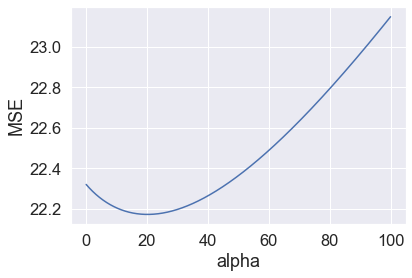

In [31]:
plt.plot(np.arange(0,100,0.0025), min_test_mse_list)
# note we need the same alpha value
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.show()

## Lasso Regression


In [32]:
from sklearn.linear_model import Lasso

min_test_mse = 40000
temp_min_test_mse_list = []

for a in np.arange(0,100,0.0025):
    lasso = Lasso(alpha=a)
    lasso.fit(X_train, y_train)
    temp_min_test_mse_list.append(mean_squared_error(lasso.predict(X_test), y_test))
    if mean_squared_error(lasso.predict(X_test), y_test) < min_test_mse:
        best_a = a
        min_test_mse = mean_squared_error(lasso.predict(X_test), y_test)
        coef = lasso.coef_
        intercept = lasso.intercept_
        train_R2 = lasso.score(X_train, y_train)
        test_R2 = lasso.score(X_test, y_test)
        train_mse = mean_squared_error(lasso.predict(X_train), y_train)

print('Lowest test MSE is ', min_test_mse)
print('Best Alpha is ', best_a)
print('coefficient: ', coef)
print('intercept: ', intercept)
print('R2 training: ', train_R2)
print('MSE training: ', train_mse)
print('R2 testing: ', test_R2)
print('MSE testing: ', min_test_mse)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3443.3694397795957, tolerance: 2.8633418781163438
  positive)


Lowest test MSE is  22.255010890907336
Best Alpha is  0.015
coefficient:  [ 0.62091282 -0.07651368  0.2329937  -0.         -0.07433262 -0.21423566
 -0.         -0.20650383 -0.1105424  -0.23422602 -0.36181673  0.31868181
 -0.04313361 -0.31788376  0.69770001  0.21076663  0.49648719 -1.35545573
  3.76124341 -0.60486327 -2.81225252  1.60909098 -1.30156511 -1.89676637
  0.93078016 -2.90922023]
intercept:  23.911911357340742
R2 training:  0.7592517191140773
MSE training:  19.09541924501881
R2 testing:  0.6792302245986732
MSE testing:  22.255010890907336


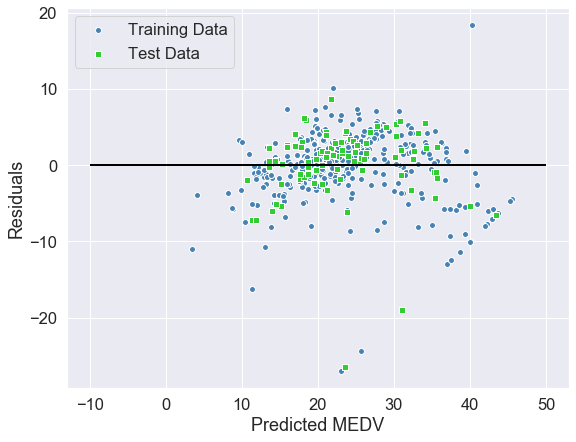

In [33]:
lasso_best = Lasso(alpha=0.015)
lasso_best.fit(X_train, y_train)

y_train_pred_lasso = lasso_best.predict(X_train)
y_test_pred_lasso = lasso_best.predict(X_test)

residual_train_lasso = y_train_pred_lasso - y_train
residual_test_lasso = y_test_pred_lasso - y_test
plt.figure(figsize=(9,7))
plt.scatter(y_train_pred_lasso, residual_train_lasso, c='steelblue', marker='o', edgecolor='white', label='Training Data')
plt.scatter(y_test_pred_lasso, residual_test_lasso, c='limegreen', marker='s', edgecolor='white', label='Test Data')
plt.xlabel("Predicted MEDV")
plt.ylabel("Residuals")
plt.hlines(y=0,xmin=-10,xmax=50, color='black',lw=2)
plt.legend(loc='upper left')
plt.show()

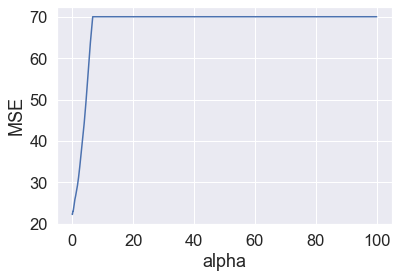

In [38]:
plt.plot(np.arange(0,100,0.0025), temp_min_test_mse_list)
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.show()


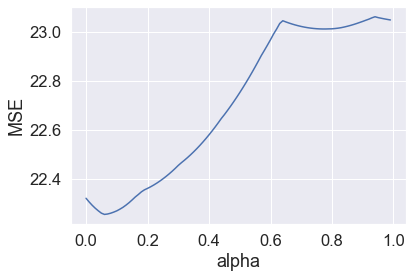

In [41]:
plt.plot(np.arange(0,1,0.01), temp_min_test_mse_list[:100])
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.show()

In [42]:
print("My name is {Qianyi Liu}")
print("My NetID is: {qianyil2}")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is {Qianyi Liu}
My NetID is: {qianyil2}
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
